# USA GP 2022 resume

This jupyter notebook contains some insights about the USA Grand Prix runned in Circuit of the Americas on October 23rd 2022

## Setup

First let's load some libraries that will be useful

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Load information

The information is taken from the website of pitwall.app, the data is the time lap from the drivers and the position, let's load the information of the top 6 drivers: Verstappen, Hamilton, Leclerc, Perez, Russell and Norris

First lets load the information of Verstappen and Hamilton

In [2]:
info_1_2 = pd.read_html('https://pitwall.app/analysis/compare-lap-times?utf8=%E2%9C%93&season=74&race=1174&main_driver=14&compare_driver=10&button=')[0]

In [3]:
info_1_2.head()

,Lap,Driver,Pos,Time VER,Driver.1,Pos.1,Time HAM,Delta
0,1,#33 Max Verstappen,1st,1:41.343,#44 Lewis Hamilton,2nd,1:42.630,-1.287
1,2,#33 Max Verstappen,1st,1:41.696,#44 Lewis Hamilton,2nd,1:42.325,-0.629
2,3,#33 Max Verstappen,1st,1:41.893,#44 Lewis Hamilton,2nd,1:42.175,-0.282
3,4,#33 Max Verstappen,1st,1:42.581,#44 Lewis Hamilton,2nd,1:42.798,-0.217
4,5,#33 Max Verstappen,1st,1:42.870,#44 Lewis Hamilton,2nd,1:43.196,-0.326


In [4]:
lap_ver = info_1_2.set_index('Lap').drop(columns=['Driver','Driver.1','Pos.1','Time HAM','Delta'])
lap_ver['Pos'] = [int(x[:-2]) for x in list(lap_ver['Pos'])]

In [5]:
lap_ver.head()

,Pos,Time VER
Lap,,
1,1,1:41.343
2,1,1:41.696
3,1,1:41.893
4,1,1:42.581
5,1,1:42.870


In [6]:
lap_ham = info_1_2.set_index('Lap').drop(columns=['Driver','Pos','Time VER','Driver.1','Delta'])
lap_ham = lap_ham.rename(columns={'Pos.1':'Pos'})
lap_ham['Pos'] = [int(x[:-2]) for x in list(lap_ham['Pos'])]

In [7]:
lap_ham.head()

,Pos,Time HAM
Lap,,
1,2,1:42.630
2,2,1:42.325
3,2,1:42.175
4,2,1:42.798
5,2,1:43.196


Now for the third and fourth place Leclerc and Perez

In [8]:
info_3_4 = pd.read_html('https://pitwall.app/analysis/compare-lap-times?utf8=%E2%9C%93&season=74&race=1174&main_driver=3&compare_driver=11&button=')[0]

In [9]:
info_3_4.head()

,Lap,Driver,Pos,Time LEC,Driver.1,Pos.1,Time PER,Delta
0,1,#16 Charles Leclerc,10th,1:49.474,#11 Sergio PÃ©rez,7th,1:47.523,1.951
1,2,#16 Charles Leclerc,9th,1:44.138,#11 Sergio PÃ©rez,6th,1:43.173,0.965
2,3,#16 Charles Leclerc,9th,1:43.357,#11 Sergio PÃ©rez,6th,1:42.470,0.887
3,4,#16 Charles Leclerc,9th,1:44.133,#11 Sergio PÃ©rez,5th,1:42.679,1.454
4,5,#16 Charles Leclerc,7th,1:43.960,#11 Sergio PÃ©rez,5th,1:43.791,0.169


In [10]:
lap_lec = info_3_4.set_index('Lap').drop(columns=['Driver','Driver.1','Pos.1','Time PER','Delta'])
lap_lec['Pos'] = [int(x[:-2]) for x in list(lap_lec['Pos'])]

In [11]:
lap_lec.head()

,Pos,Time LEC
Lap,,
1,10,1:49.474
2,9,1:44.138
3,9,1:43.357
4,9,1:44.133
5,7,1:43.960


In [12]:
lap_per = info_3_4.set_index('Lap').drop(columns=['Driver','Pos','Time LEC','Driver.1','Delta'])
lap_per = lap_per.rename(columns={'Pos.1':'Pos'})
lap_per['Pos'] = [int(x[:-2]) for x in list(lap_per['Pos'])]

In [13]:
lap_per.head()

,Pos,Time PER
Lap,,
1,7,1:47.523
2,6,1:43.173
3,6,1:42.470
4,5,1:42.679
5,5,1:43.791


Finally lets take the data from the fifth and sixth place Russell and Norris

In [14]:
info_5_6 = pd.read_html('https://pitwall.app/analysis/compare-lap-times?utf8=%E2%9C%93&season=74&race=1174&main_driver=20&compare_driver=7&button=')[0]

In [15]:
info_5_6.head()

,Lap,Driver,Pos,Time RUS,Driver.1,Pos.1,Time NOR,Delta
0,1,#63 George Russell,4th,1:45.339,#4 Lando Norris,6th,1:47.107,-1.768
1,2,#63 George Russell,4th,1:43.183,#4 Lando Norris,7th,1:44.959,-1.776
2,3,#63 George Russell,4th,1:42.912,#4 Lando Norris,7th,1:43.762,-0.850
3,4,#63 George Russell,4th,1:43.091,#4 Lando Norris,8th,1:44.808,-1.717
4,5,#63 George Russell,3rd,1:43.669,#4 Lando Norris,8th,1:45.329,-1.660


In [16]:
lap_rus = info_5_6.set_index('Lap').drop(columns=['Driver','Driver.1','Pos.1','Time NOR','Delta'])
lap_rus['Pos'] = [int(x[:-2]) for x in list(lap_rus['Pos'])]

In [17]:
lap_rus.head()

,Pos,Time RUS
Lap,,
1,4,1:45.339
2,4,1:43.183
3,4,1:42.912
4,4,1:43.091
5,3,1:43.669


In [18]:
lap_nor = info_5_6.set_index('Lap').drop(columns=['Driver','Driver.1','Pos','Time RUS','Delta'])
lap_nor = lap_nor.rename(columns={'Pos.1':'Pos'})
lap_nor['Pos'] = [int(x[:-2]) for x in list(lap_nor['Pos'])]

In [19]:
lap_nor.head()

,Pos,Time NOR
Lap,,
1,6,1:47.107
2,7,1:44.959
3,7,1:43.762
4,8,1:44.808
5,8,1:45.329


## Comparison of times of the first six drivers

The first graph will be a timeseries plot of the lap time of each pilot

In [20]:
lapg = range(1,57)
laptV = list(lap_ver['Time VER'])
laptH = list(lap_ham['Time HAM'])
laptL = list(lap_lec['Time LEC'])
laptP = list(lap_per['Time PER'])
laptR = list(lap_rus['Time RUS'])
laptN = list(lap_nor['Time NOR'])

In [21]:
x = lapg
yV = mdates.datestr2num(laptV)
yH = mdates.datestr2num(laptH)
yL = mdates.datestr2num(laptL)
yP = mdates.datestr2num(laptP)
yR = mdates.datestr2num(laptR)
yN = mdates.datestr2num(laptN)

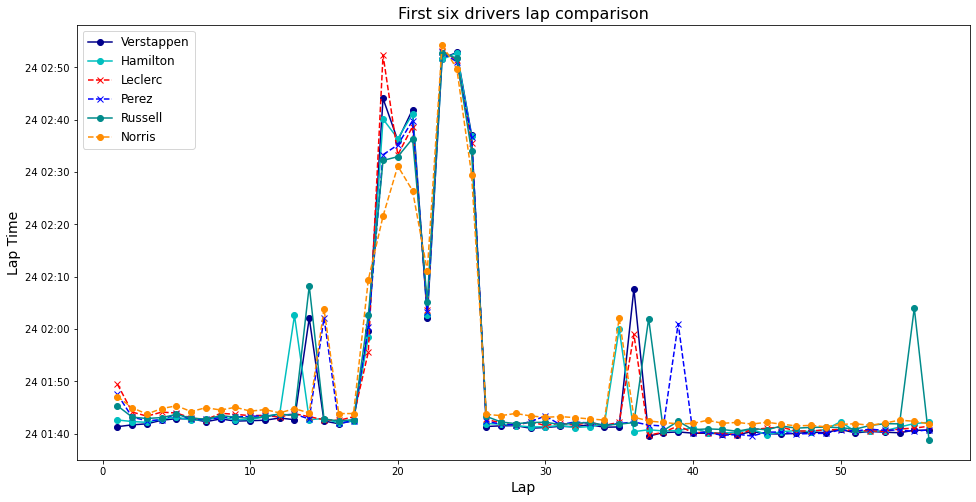

In [22]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(x,yV, color='darkblue', linestyle='solid', marker='o', label='Verstappen')
ax.plot(x,yH,'co-', label='Hamilton')
ax.plot(x,yL, color='red', linestyle='dashed', marker='x', label='Leclerc')
ax.plot(x,yP, color='blue', linestyle='dashed', marker='x', label='Perez')
ax.plot(x,yR, color='darkcyan', linestyle='solid', marker='o', label='Russell')
ax.plot(x,yN, color='darkorange', linestyle='dashed', marker='o', label='Norris')
ax.yaxis_date()
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_xlabel('Lap',fontsize=14)
ax.set_title('First six drivers lap comparison', fontsize=16)
ax.legend(loc='upper left', fontsize=12)
plt.show()
fig.savefig('First six drivers lap comparison.jpeg')

The USA GP of 2022 had two safety cars right immediately one after other, they were deployed between laps 18 and lap 26 so lets remove it, to make a zoom in the time laps.

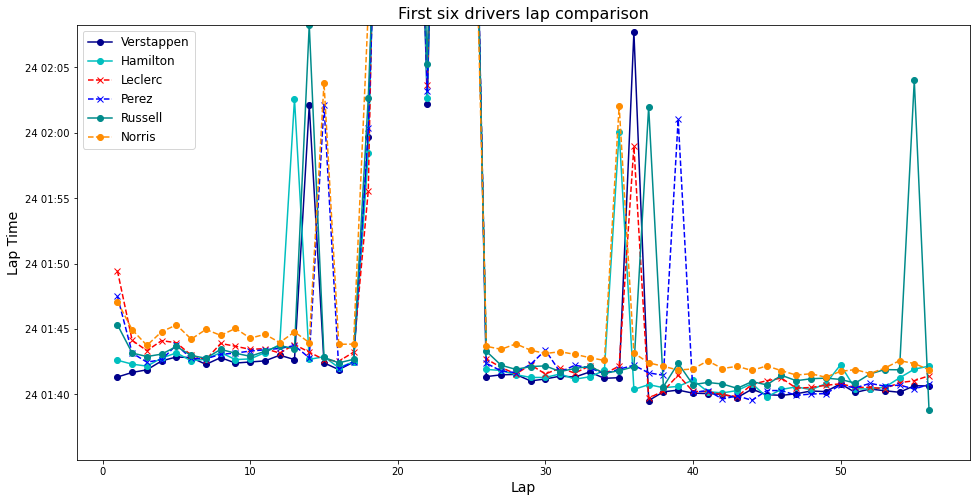

In [23]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(x,yV, color='darkblue', linestyle='solid', marker='o', label='Verstappen')
ax.plot(x,yH,'co-', label='Hamilton')
ax.plot(x,yL, color='red', linestyle='dashed', marker='x', label='Leclerc')
ax.plot(x,yP, color='blue', linestyle='dashed', marker='x', label='Perez')
ax.plot(x,yR, color='darkcyan', linestyle='solid', marker='o', label='Russell')
ax.plot(x,yN, color='darkorange', linestyle='dashed', marker='o', label='Norris')
ax.yaxis_date()
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_ylim(bottom=None, top=yR[13])
ax.set_xlabel('Lap',fontsize=14)
ax.set_title('First six drivers lap comparison', fontsize=16)
ax.legend(loc='upper left', fontsize=12)
plt.show()
fig.savefig('First six drivers lap comparison without safety cars.jpeg')

The fastest cars through the entire grand prix was Verstappen, even after the mistake of the team in the second pit stop. Now let's check the last laps where Verstappen overtook Hamilton lap 40+

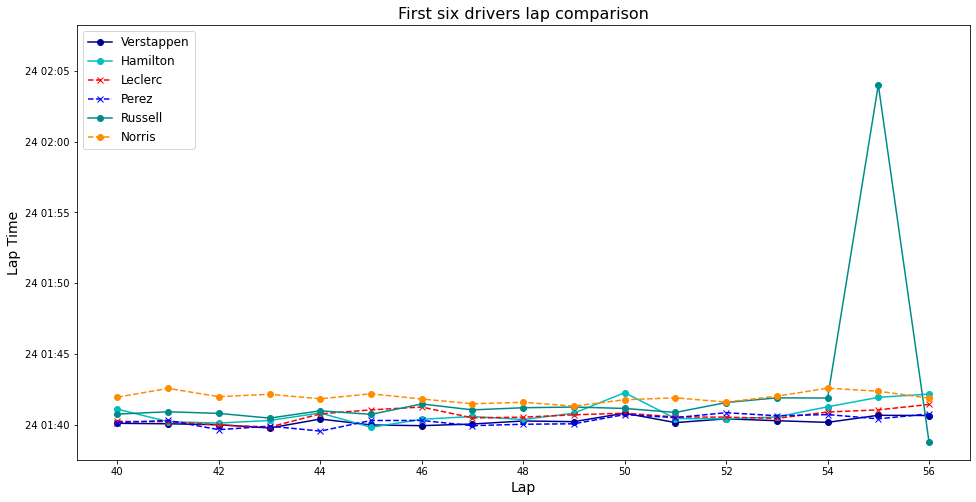

In [24]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(x[39:],yV[39:], color='darkblue', linestyle='solid', marker='o', label='Verstappen')
ax.plot(x[39:],yH[39:],'co-', label='Hamilton')
ax.plot(x[39:],yL[39:], color='red', linestyle='dashed', marker='x', label='Leclerc')
ax.plot(x[39:],yP[39:], color='blue', linestyle='dashed', marker='x', label='Perez')
ax.plot(x[39:],yR[39:], color='darkcyan', linestyle='solid', marker='o', label='Russell')
ax.plot(x[39:],yN[39:], color='darkorange', linestyle='dashed', marker='o', label='Norris')
ax.yaxis_date()
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_ylim(bottom=None, top=yR[13])
ax.set_xlabel('Lap',fontsize=14)
ax.set_title('First six drivers lap comparison', fontsize=16)
ax.legend(loc='upper left', fontsize=12)
plt.show()
fig.savefig('First six drivers lap comparison 40+.jpeg')

Regarding the fight for the win between Hamilton and Verstappen, Verstappen was slightly faster than Hamilton.

The fastest lap was achieved by George Russell in lap 56

In [25]:
lap_rus['Time RUS'].loc[56]

'1:38.788'

## Tyres times comparison 

For the tyre time comparison, the times during the virtual safety cars or safety cars will not taken in count.

First let's check the average lap time tyres comparison of Max Verstappen

In [26]:
ver2 = list(range(15,18))+list(range(26,36))
ver_1m = lap_ver.loc[:13]
ver_2h = lap_ver.loc[ver2]
ver_3m = lap_ver.loc[37:]

In [27]:
yV_1m = mdates.datestr2num(list(ver_1m['Time VER']))
yV_2h = mdates.datestr2num(list(ver_2h['Time VER']))
yV_3m = mdates.datestr2num(list(ver_3m['Time VER']))

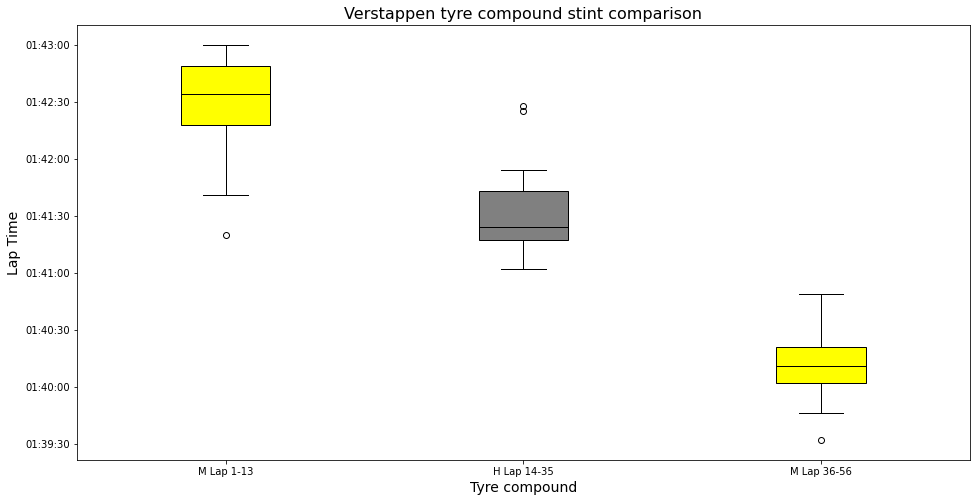

In [28]:
fig, ax = plt.subplots(figsize=(16,8))
bplotV = ax.boxplot((yV_1m,yV_2h,yV_3m),
          patch_artist=True,
          labels = ['M Lap 1-13','H Lap 14-35', 'M Lap 36-56'],
          medianprops=dict(color='black'))
ax.yaxis_date()
ax.set_xlabel('Tyre compound', fontsize=14)
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_title('Verstappen tyre compound stint comparison', fontsize=16)
bplotV['boxes'][0].set_facecolor('yellow')
bplotV['boxes'][1].set_facecolor('gray')
bplotV['boxes'][2].set_facecolor('yellow')
plt.show
fig.savefig('Max Verstappen BP Tyre.jpeg')

Now let's check the times from Hamilton

In [29]:
ham2 = list(range(14,18))+list(range(26,35))
ham_1m = lap_ham.loc[:12]
ham_2h = lap_ham.loc[ham2]
ham_3h = lap_ham.loc[36:]

In [30]:
yH_1m = mdates.datestr2num(list(ham_1m['Time HAM']))
yH_2h = mdates.datestr2num(list(ham_2h['Time HAM']))
yH_3h = mdates.datestr2num(list(ham_3h['Time HAM']))

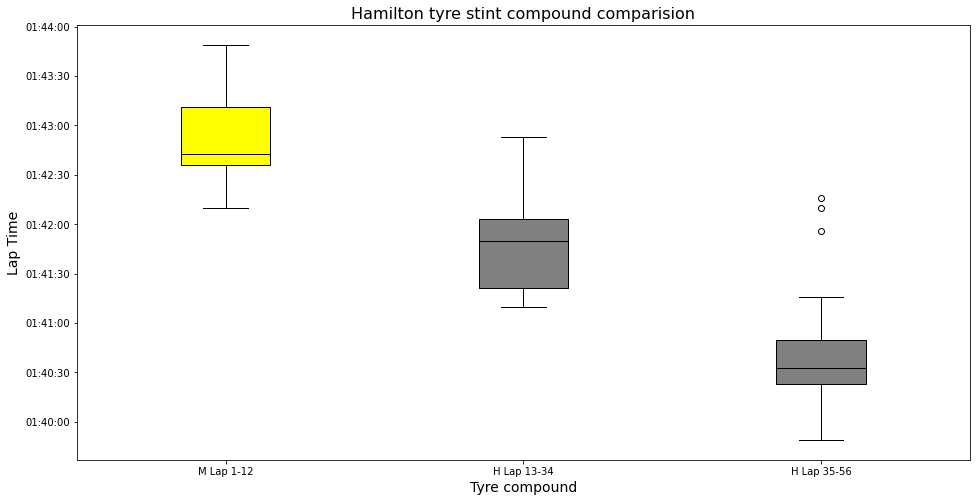

In [31]:
fig, ax = plt.subplots(figsize=(16,8))
bplotH = ax.boxplot((yH_1m, yH_2h, yH_3h),
          patch_artist=True,
          labels = ['M Lap 1-12','H Lap 13-34', 'H Lap 35-56'],
          medianprops=dict(color='black'))
bplotH['boxes'][0].set_facecolor('yellow')
bplotH['boxes'][1].set_facecolor('gray')
bplotH['boxes'][2].set_facecolor('gray')
ax.yaxis_date()
ax.set_xlabel('Tyre compound', fontsize=14)
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_title('Hamilton tyre stint compound comparision', fontsize=16)
plt.show
fig.savefig('Hamilton BP Tyre.jpeg')

Now let's check for the average lap time of Leclerc

In [32]:
lec_1m = lap_lec.loc[:17]
lec_2h = lap_lec.loc[26:35]
lec_3m = lap_lec.loc[37:]

In [33]:
yL_1m = mdates.datestr2num(list(lec_1m['Time LEC']))
yL_2h = mdates.datestr2num(list(lec_2h['Time LEC']))
yL_3m = mdates.datestr2num(list(lec_3m['Time LEC']))

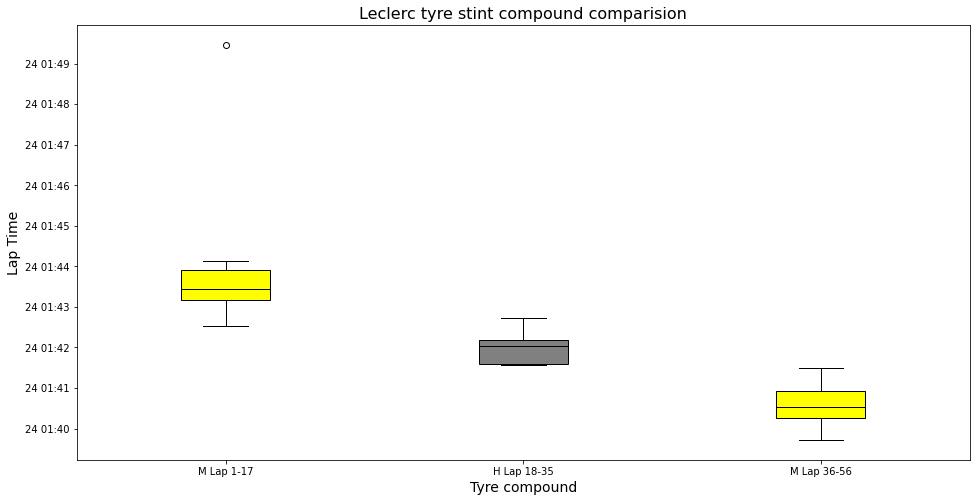

In [34]:
fig, ax = plt.subplots(figsize=(16,8))
bplotL = ax.boxplot((yL_1m,yL_2h, yL_3m),
          patch_artist=True,
          labels = ['M Lap 1-17','H Lap 18-35', 'M Lap 36-56'],
          medianprops=dict(color='black'))
bplotL['boxes'][0].set_facecolor('yellow')
bplotL['boxes'][1].set_facecolor('gray')
bplotL['boxes'][2].set_facecolor('yellow')
ax.yaxis_date()
ax.set_xlabel('Tyre compound', fontsize=14)
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_title('Leclerc tyre stint compound comparision', fontsize=16)
plt.show
fig.savefig('Leclerc Sainz BP Tyre.jpeg')

Next one is the lap time average of Perez

In [35]:
per2 = list(range(16,18))+list(range(26,39))
per_1m = lap_per.loc[:14]
per_2h = lap_per.loc[per2]
per_3m = lap_per.loc[40:]

In [36]:
yP_1m = mdates.datestr2num(list(per_1m['Time PER']))
yP_2h = mdates.datestr2num(list(per_2h['Time PER']))
yP_3m = mdates.datestr2num(list(per_3m['Time PER']))

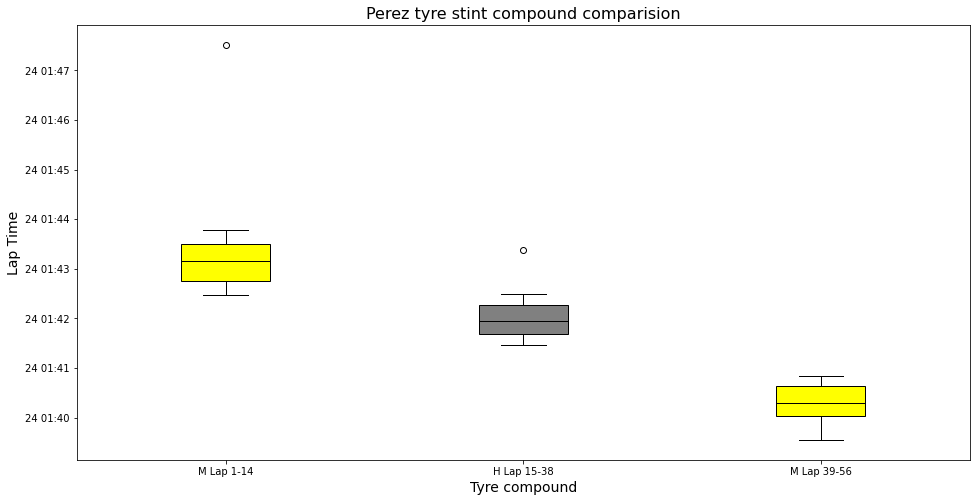

In [37]:
fig, ax = plt.subplots(figsize=(16,8))
bplotP = ax.boxplot((yP_1m, yP_2h, yP_3m),
          patch_artist=True,
          labels = ['M Lap 1-14','H Lap 15-38', 'M Lap 39-56'],
          medianprops=dict(color='black'))
bplotP['boxes'][0].set_facecolor('yellow')
bplotP['boxes'][1].set_facecolor('gray')
bplotP['boxes'][2].set_facecolor('yellow')
ax.yaxis_date()
ax.set_xlabel('Tyre compound', fontsize=14)
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_title('Perez tyre stint compound comparision', fontsize=16)
plt.show
fig.savefig('Perez BP Tyre.jpeg')

Now for Russell

In [38]:
rus2 = list(range(15,18))+list(range(26,37))
rus_1m = lap_rus.loc[:13]
rus_2h = lap_rus.loc[rus2]
rus_3h = lap_rus.loc[38:54]

In [39]:
yR_1m = mdates.datestr2num(list(rus_1m['Time RUS']))
yR_2h = mdates.datestr2num(list(rus_2h['Time RUS']))
yR_3h = mdates.datestr2num(list(rus_3h['Time RUS']))

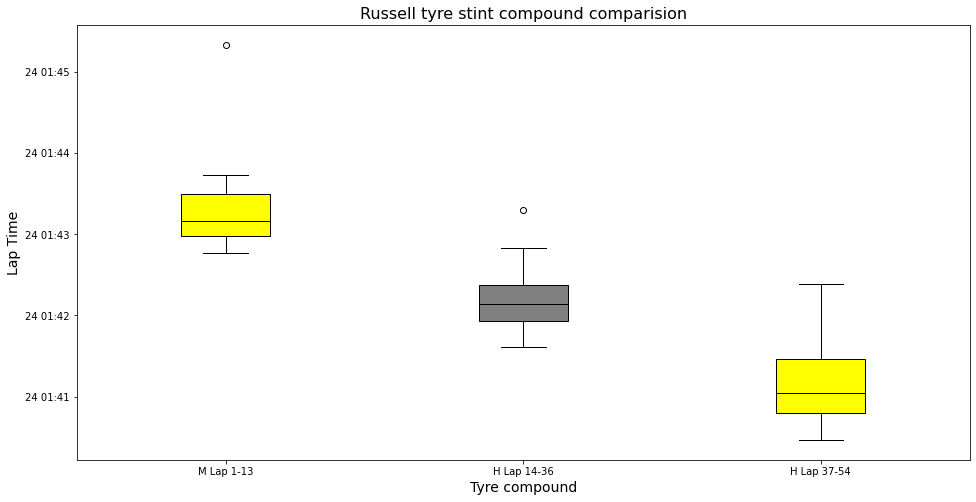

In [40]:
fig, ax = plt.subplots(figsize=(16,8))
bplotR = ax.boxplot((yR_1m,yR_2h, yR_3h),
          patch_artist=True,
          labels = ['M Lap 1-13','H Lap 14-36', 'H Lap 37-54'],
          medianprops=dict(color='black'))
bplotR['boxes'][0].set_facecolor('yellow')
bplotR['boxes'][1].set_facecolor('gray')
bplotR['boxes'][2].set_facecolor('yellow')
ax.yaxis_date()
ax.set_xlabel('Tyre compound', fontsize=14)
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_title('Russell tyre stint compound comparision', fontsize=16)
plt.show
fig.savefig('Russell BP Tyre.jpeg')

And finally for Norris.

In [41]:
list(range(16,18))+list(range(26,35))

[16, 17, 26, 27, 28, 29, 30, 31, 32, 33, 34]

In [42]:
nor2 = list(range(16,18))+list(range(26,35))
nor_1m = lap_nor.loc[:14]
nor_2h = lap_nor.loc[nor2]
nor_3h = lap_nor.loc[36:]

In [43]:
yN_1m = mdates.datestr2num(list(nor_1m['Time NOR']))
yN_2h = mdates.datestr2num(list(nor_2h['Time NOR']))
yN_3h = mdates.datestr2num(list(nor_3h['Time NOR']))

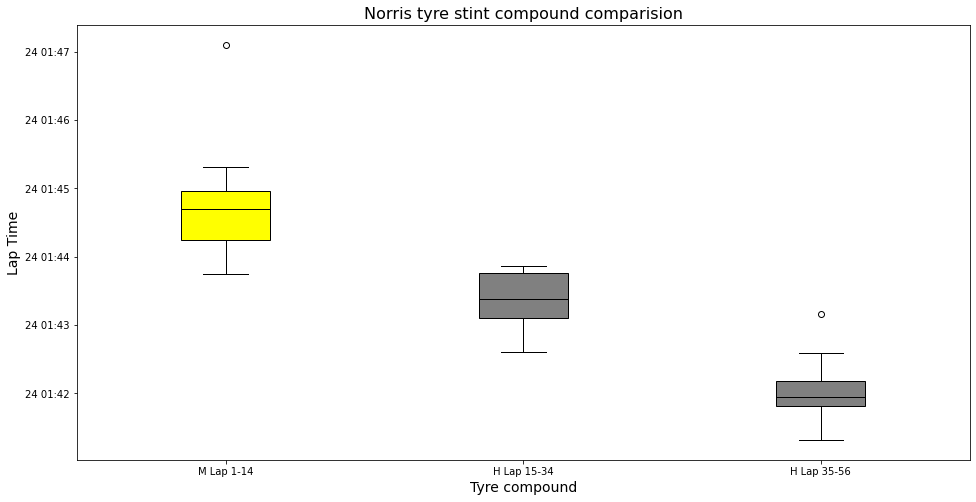

In [44]:
fig, ax = plt.subplots(figsize=(16,8))
bplotN = ax.boxplot((yN_1m, yN_2h, yN_3h),
          patch_artist=True,
          labels = ['M Lap 1-14','H Lap 15-34', 'H Lap 35-56'],
          medianprops=dict(color='black'))
bplotN['boxes'][0].set_facecolor('yellow')
bplotN['boxes'][1].set_facecolor('gray')
bplotN['boxes'][2].set_facecolor('gray')
ax.yaxis_date()
ax.set_xlabel('Tyre compound', fontsize=14)
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_title('Norris tyre stint compound comparision', fontsize=16)
plt.show
fig.savefig('Norris BP Tyre.jpeg')

# Comparison time laps between pilots

Finally let's make a comparison between the pilots, the first stint is from lap 1 to lap 15, all drivers had Mediums, the second stint between laps 16-37, all drivers with hards, and the last one between laps 37-56.
The times doesn't take in count the safety car and virtual safety cars time laps.

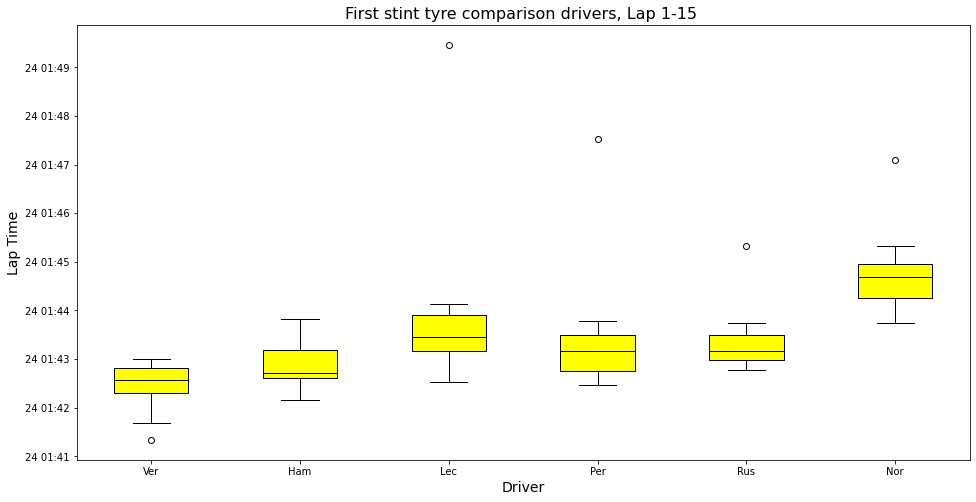

In [45]:
fig, ax = plt.subplots(figsize=(16,8))
bplot1 = ax.boxplot((yV_1m,yH_1m,yL_1m,yP_1m,yR_1m,yN_1m),
          patch_artist=True,
          labels = ['Ver','Ham','Lec','Per','Rus','Nor'],
          medianprops=dict(color='black'))
bplot1['boxes'][0].set_facecolor('yellow')
bplot1['boxes'][1].set_facecolor('yellow')
bplot1['boxes'][2].set_facecolor('yellow')
bplot1['boxes'][3].set_facecolor('yellow')
bplot1['boxes'][4].set_facecolor('yellow')
bplot1['boxes'][5].set_facecolor('yellow')
ax.yaxis_date()
ax.set_xlabel('Driver', fontsize=14)
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_title('First stint tyre comparison drivers, Lap 1-15 ', fontsize=16)
plt.show
fig.savefig('First stint tyre.jpeg')

Now for the second stint which began at lap 16

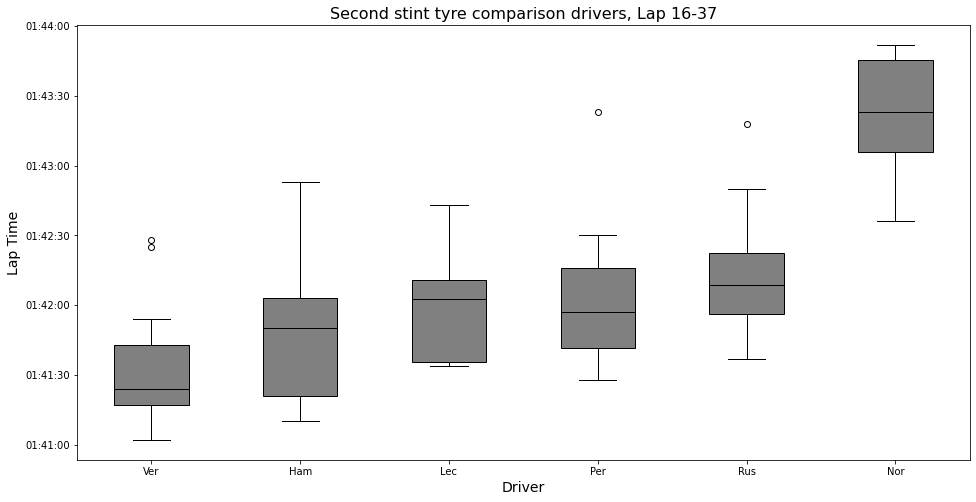

In [46]:
fig, ax = plt.subplots(figsize=(16,8))
bplot2 = ax.boxplot((yV_2h,yH_2h,yL_2h,yP_2h,yR_2h,yN_2h),
          patch_artist=True,
          labels = ['Ver','Ham','Lec','Per','Rus','Nor'],
          medianprops=dict(color='black'))
bplot2['boxes'][0].set_facecolor('gray')
bplot2['boxes'][1].set_facecolor('gray')
bplot2['boxes'][2].set_facecolor('gray')
bplot2['boxes'][3].set_facecolor('gray')
bplot2['boxes'][4].set_facecolor('gray')
bplot2['boxes'][5].set_facecolor('gray')
ax.yaxis_date()
ax.set_xlabel('Driver', fontsize=14)
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_title('Second stint tyre comparison drivers, Lap 16-37', fontsize=16)
plt.show
fig.savefig('Second stint tyre comparison.jpeg')

And finally the third and last stint

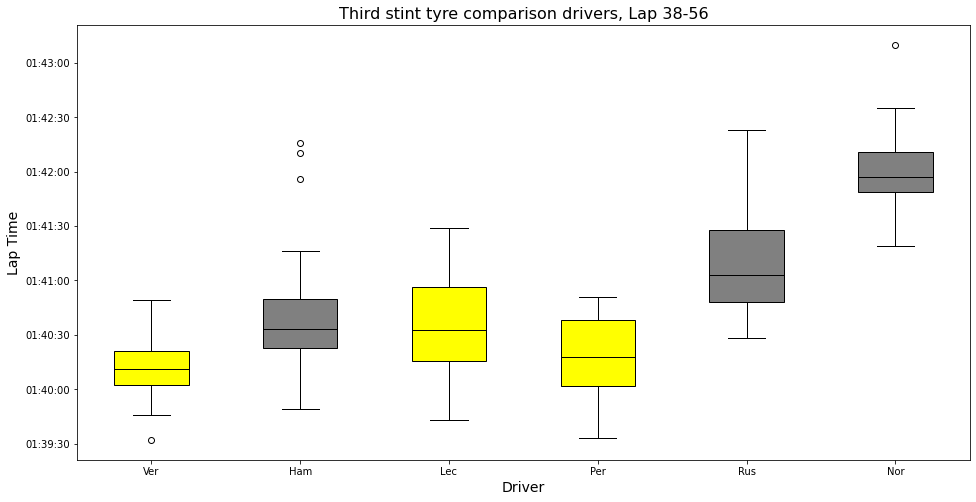

In [47]:
fig, ax = plt.subplots(figsize=(16,8))
bplot3 = ax.boxplot((yV_3m,yH_3h,yL_3m,yP_3m,yR_3h,yN_3h),
          patch_artist=True,
          labels = ['Ver','Ham','Lec','Per','Rus','Nor'],
          medianprops=dict(color='black'))
bplot3['boxes'][0].set_facecolor('yellow')
bplot3['boxes'][1].set_facecolor('gray')
bplot3['boxes'][2].set_facecolor('yellow')
bplot3['boxes'][3].set_facecolor('yellow')
bplot3['boxes'][4].set_facecolor('gray')
bplot3['boxes'][5].set_facecolor('gray')
ax.yaxis_date()
ax.set_xlabel('Driver', fontsize=14)
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_title('Third stint tyre comparison drivers, Lap 38-56', fontsize=16)
plt.show
fig.savefig('Third stint tyre comparison.jpeg')

# Timeseries for race position

Finally a time series plot for the position of the first 6 drivers.

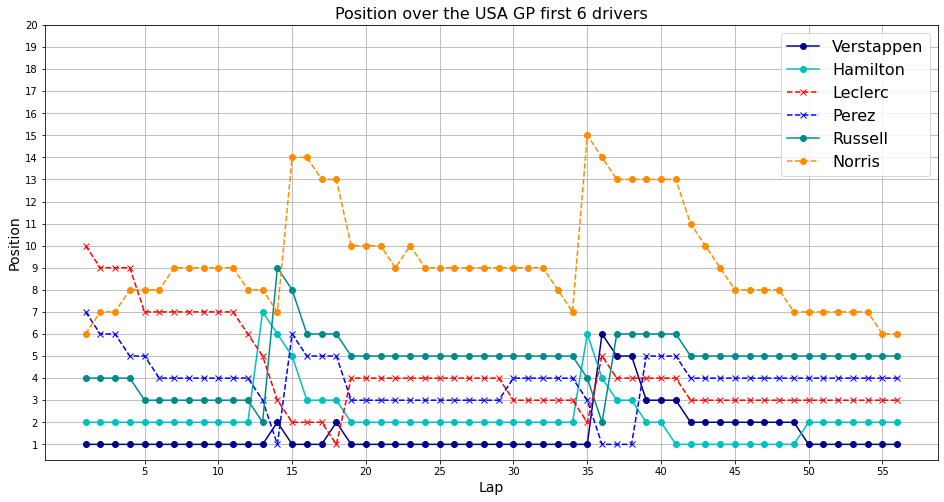

In [48]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(x, lap_ver['Pos'], color='darkblue', linestyle='solid', marker='o', label='Verstappen')
ax.plot(x, lap_ham['Pos'], 'co-', label='Hamilton')
ax.plot(x, lap_lec['Pos'], color='red', linestyle='dashed', marker='x', label='Leclerc')
ax.plot(x, lap_per['Pos'], color='blue', linestyle='dashed', marker='x', label='Perez')
ax.plot(x, lap_rus['Pos'], color='darkcyan', linestyle='solid', marker='o', label='Russell')
ax.plot(x, lap_nor['Pos'], color='darkorange', linestyle='dashed', marker='o', label='Norris')
ax.set_ylabel('Position', fontsize=14)
ax.set_xlabel('Lap', fontsize=14)
ax.set_title('Position over the USA GP first 6 drivers', fontsize=16)
ax.legend(loc='upper right', fontsize=16)
plt.yticks(list(range(1,21)))
plt.xticks(list(range(5,57,5)))
ax.grid(True)
plt.show()
fig.savefig('Position over the Singapore GP first 6 drivers.jpeg')